# PROJECT UNDERSTANDING

**Introduction**

Sepsis is a life-threatening medical condition that occurs when the body's response to an infection injures its own tissues and organs. It is a leading cause of death in hospitals worldwide, and its incidence is increasing. Early diagnosis and treatment of sepsis are crucial for improving patient outcomes. However, sepsis can be difficult to diagnose in its early stages, as its symptoms can be subtle and nonspecific.

Early diagnosis and treatment of sepsis is critical for improving patient outcomes. However, sepsis can be difficult to diagnose early because its symptoms are often non-specific and can overlap with other conditions. As a result, sepsis is often underdiagnosed or misdiagnosed, leading to delayed treatment and worse patient outcomes.

A sepsis prediction model could help to improve the early diagnosis and treatment of sepsis by identifying patients who are at high risk of developing the condition. This could be done by using machine learning algorithms to analyze patient data from electronic health records (EHRs).



Read About Data Columns **[here](https://github.com/fantastic-rambo/Embedding-Machine-Learning-Model-in-FastAPI/blob/main/data/README.md)**

**About the Datasets:**

* **ID:**                            Unique patient identifier.
* **PRG** (Plasma glucose):          Measurement of plasma glucose levels.
* **PL** (Blood Work Result-1):      First blood work result (in mu U/ml).
* **PR** (Blood Pressure):           Blood pressure measurement (in mm Hg).
* **SK** (Blood Work Result-2):       Second blood work result (in mm).
* **TS** (Blood Work Result-3):       Third blood work result (in mu U/ml).
* **M11** (Body mass index):          Body mass index calculated as weight in kg divided by the square of height in meters.
* **BD2** (Blood Work Result-4):      Fourth blood work result (in mu U/ml).
* **Age**: Age of the patient in years.

* **Insurance**:              Binary indicator of whether the patient holds a valid insurance card.

* **Sepsis**: Binary outcome indicating the development of sepsis in the ICU (Positive or Negative). otherwise


## Goal Of Project
The goal of the project is to develop a model that can predict whether or not a patient in the ICU will develop sepsis. This model could be used to identify patients who are at high risk of developing sepsis, allowing clinicians to initiate early treatment and improve patient outcomes.





## Hypothesis
**Null Hypothesis (H0)**

Age does not determine whether a patient will develop Sepsis.


**Alternative Hypothesis (Ha)**

Age determines whether a patient will develop Sepsis.




## Analytical Questions

* What is the average age of those developing sepsis?

* what is the Average BMI of those developing sepsis?

* Are there discernible demographic patterns among patients who develop sepsis, such as age, insurance status, or other demographic variables?

* What is the correlation between different medical indicators (e.g., plasma glucose, blood pressure) and the likelihood of developing sepsis?

* Do specific blood work results exhibit a noticeable impact on the probability of sepsis development?

* Is there a significant association between insurance status and the risk of developing sepsis in ICU patients?

* How well can we predict the likelihood of sepsis based on the available variables in the dataset?

* Are there any temporal trends in the occurrence of sepsis or changes in the distribution of key variables over time?

* How do different predictive models perform in estimating the likelihood of sepsis?

# DATA UNDERSTANDING

In [1]:
# Installations
!pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.2 kB ? eta -:--:--
     ------------------------------- ------ 51.2/61.2 kB 327.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 327.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 327.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 327.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 327.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 327.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 112.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 991.0 kB/s e

In [2]:
import pandas as pd                       # For data manipulation and analysis
import numpy as np                        # For numerical operations
import matplotlib.pyplot as plt           # For data visualization
import seaborn as sns                     # For statistical data visualization
import re
from imblearn.over_sampling import SMOTE

#import warning


#Libraries for feature scaling
from sklearn.preprocessing import StandardScaler

#Libraries for Validation
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics   #Import scikit-learn metrics module for accuracy calculation

#Libraries for Training model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn import tree

In [3]:
#Check numpy and pandas version

print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)

Numpy version:  1.24.3
Pandas version:  2.0.1


In [4]:
#loading data from Github

train_data = pd.read_csv("https://raw.githubusercontent.com/fantastic-rambo/Embedding-Machine-Learning-Model-in-FastAPI/main/data/Paitients_Files_Train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/fantastic-rambo/Embedding-Machine-Learning-Model-in-FastAPI/main/data/Paitients_Files_Test.csv")

## **Data Understanding**

In [5]:
train_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


### EDA

In [7]:
def display_dataset_info(train_data, test_data):
    """
    Display information about the train and test datasets.

    Parameters:
    - train_df: DataFrame, the training dataset.
    - test_df: DataFrame, the testing dataset.
    """
    print("Train Dataset Info:")
    train_data.info()

    print("\nTest Dataset Info:")
    test_data.info()

# Assuming you have train_data and test_data DataFrames
display_dataset_info(train_data, test_data)

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL

In [8]:
train_data.shape, test_data.shape          # checking for the shapes

((599, 11), (169, 10))

From the training dataset, I extracted information revealing a total of 599 patient records, all complete with no missing values. The dataset comprises 11 columns, including the target variable 'Sepsis.'

Also, From the test dataset, it is observed that there are a total of 169 entries. The dataset spans 10 columns, and it is noteworthy that the 'sepsis' target column is not present, indicating that sepsis outcome labels are not included in the test data.

In [9]:
train_data.duplicated().sum(), test_data.duplicated().sum()   #checking for duplicates

(0, 0)

From The Above codes, (0, 0) depicts that both the Train and Test datasets do not possess duplicated rows.

In [10]:
train_data.isna().sum()     #checking for null values

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [11]:
test_data.isna().sum()    #checking for null values

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [12]:
# Drop duplicates from the training dataset
train_data = train_data.drop_duplicates()

# Drop duplicates from the test dataset
test_data = test_data.drop_duplicates()

In [13]:
train_data.describe()     #checking statistical info of dataset

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
test_data.describe()       #checking statistical info of dataset

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


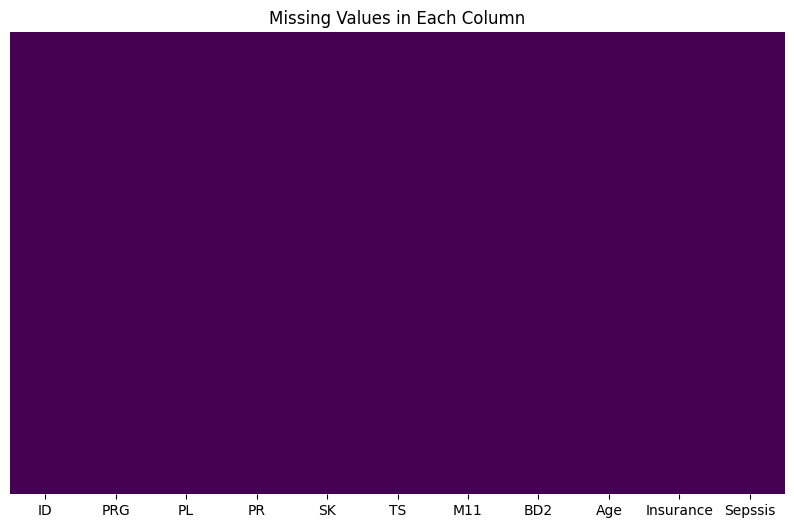

In [15]:
# a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Set plot title
plt.title('Missing Values in Each Column')

# Display the plot
plt.show()

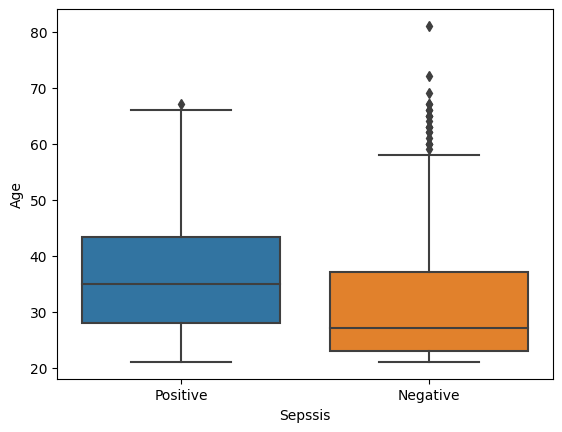

In [16]:
sns.boxplot(x='Sepssis',y='Age', data=train_data)
plt.show()

<Axes: >

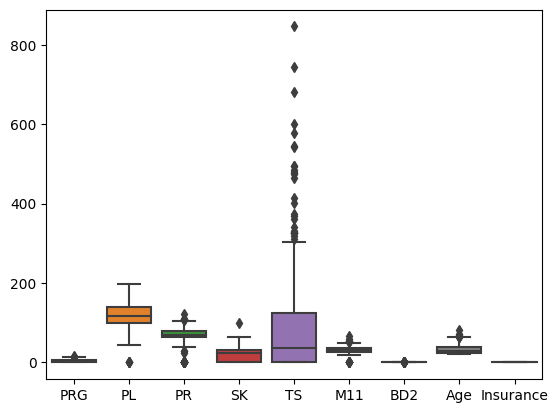

In [17]:
# plot the boxplot to see the outlier of each numerical column
sns.boxplot(data=train_data,orient="v")


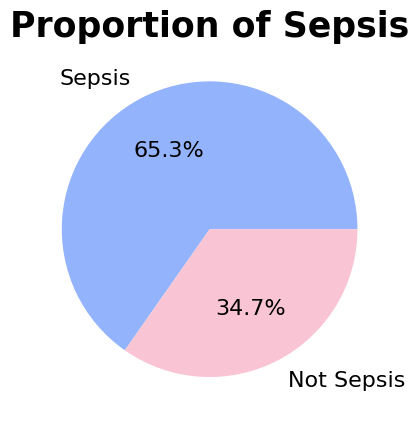

In [18]:
# Pie chart
labels = ['Sepsis', 'Not Sepsis']
#colors
colors = ['#94B3FD', '#F9C5D5']
ax = plt.pie(train_data['Sepssis'].value_counts(), labeldistance=1.15,
labels=labels, colors=colors, autopct='%1.1f%%',
textprops={'fontsize': 16});
plt.title('Proportion of Sepsis', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()

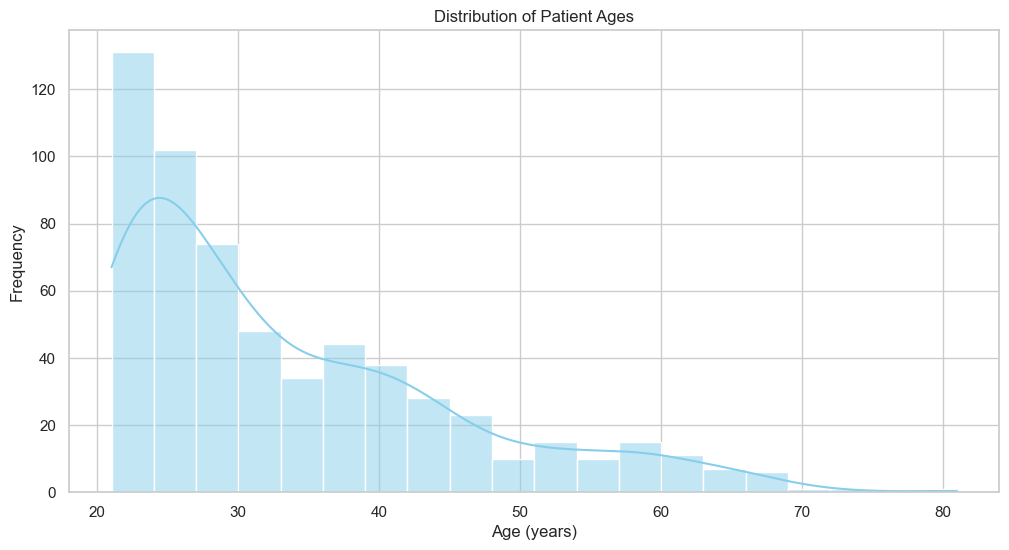

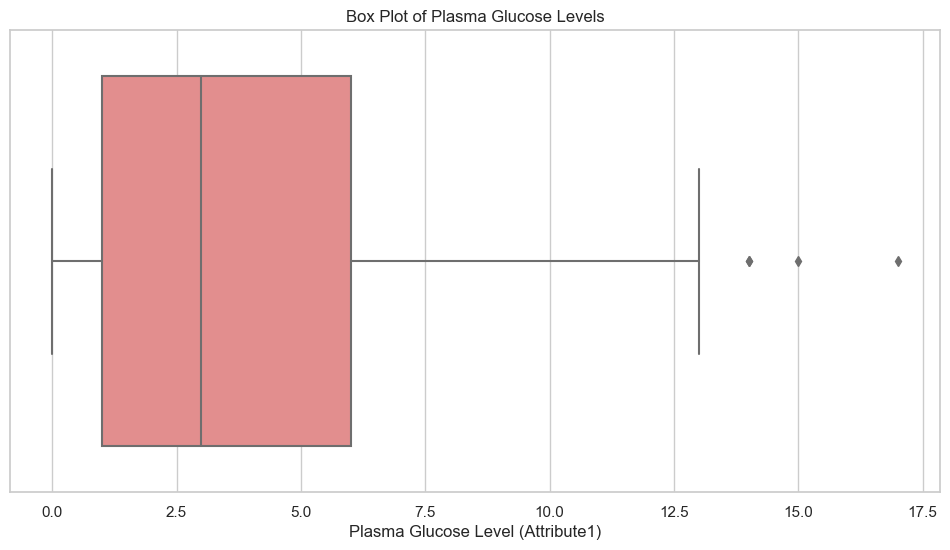

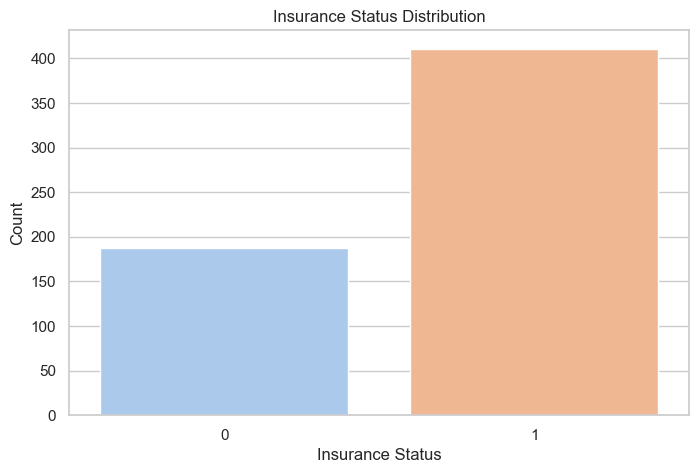

In [19]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Univariate Analysis: Distribution of Patient Ages
plt.figure(figsize=(12, 6))
sns.histplot(train_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis: Box Plot for Plasma Glucose Levels
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_data['PRG'], color='lightcoral')
plt.title('Box Plot of Plasma Glucose Levels')
plt.xlabel('Plasma Glucose Level (Attribute1)')
plt.show()

# Univariate Analysis: Bar Chart for Insurance Status
plt.figure(figsize=(8, 5))
sns.countplot(x=train_data['Insurance'], palette='pastel')
plt.title('Insurance Status Distribution')
plt.xlabel('Insurance Status')
plt.ylabel('Count')
plt.show()

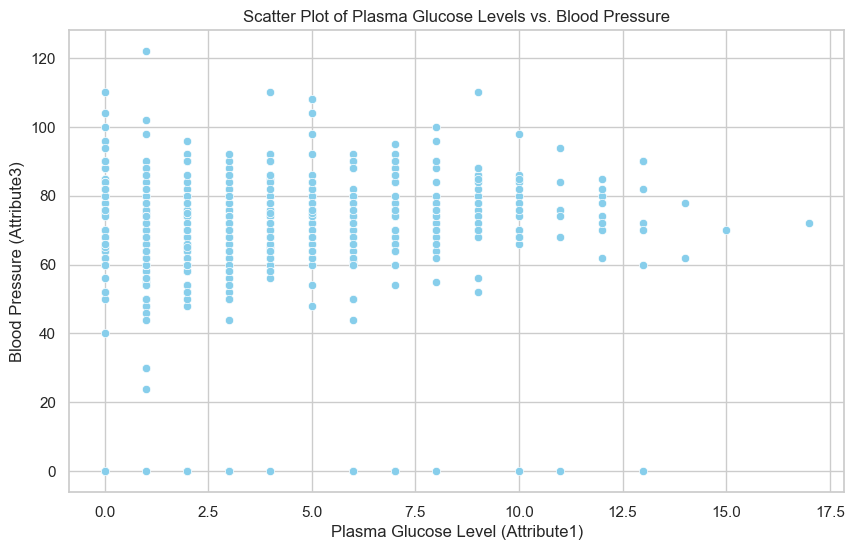

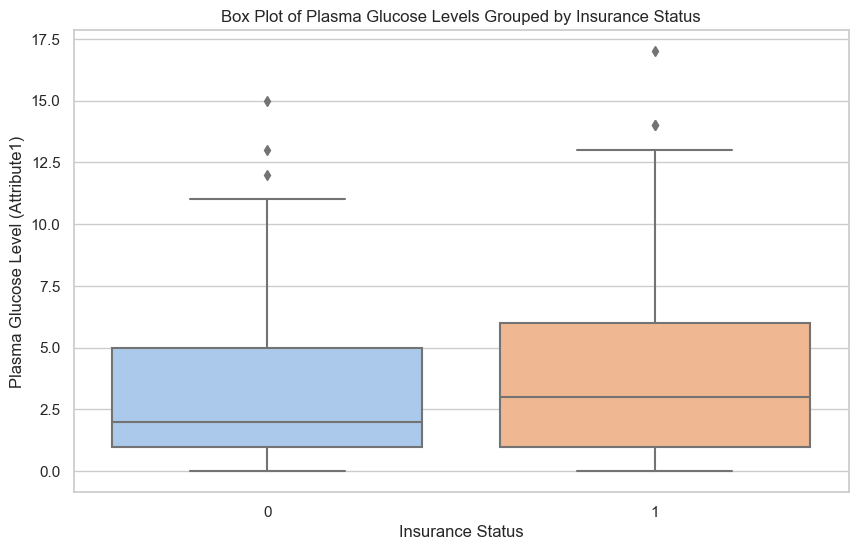

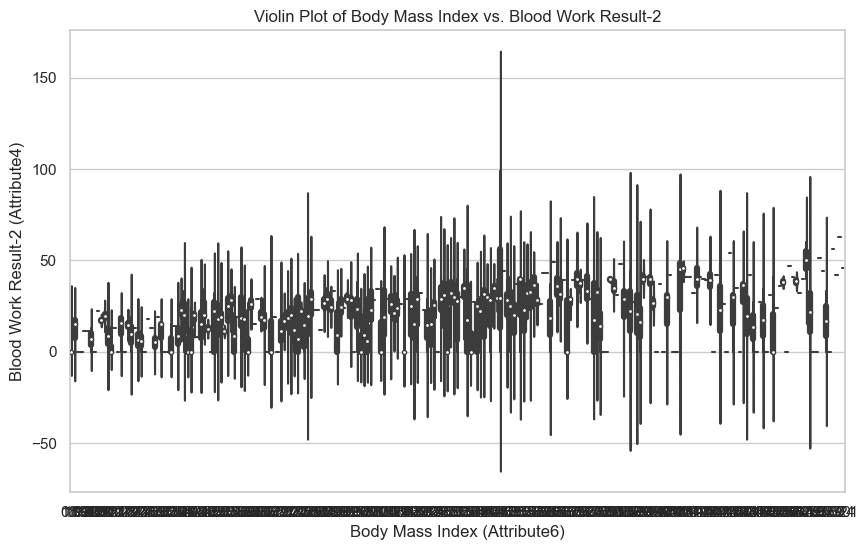

In [20]:
# Bivariate Analysis: Scatter Plot of Plasma Glucose Levels and Blood Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['PRG'], y=train_data['PR'], color='skyblue')
plt.title('Scatter Plot of Plasma Glucose Levels vs. Blood Pressure')
plt.xlabel('Plasma Glucose Level (Attribute1)')
plt.ylabel('Blood Pressure (Attribute3)')
plt.show()

# Bivariate Analysis: Box Plot of Plasma Glucose Levels Grouped by Insurance Status
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['Insurance'], y=train_data['PRG'], palette='pastel')
plt.title('Box Plot of Plasma Glucose Levels Grouped by Insurance Status')
plt.xlabel('Insurance Status')
plt.ylabel('Plasma Glucose Level (Attribute1)')
plt.show()

# Bivariate Analysis: Violin Plot of Body Mass Index and Blood Work Result-2
plt.figure(figsize=(10, 6))
sns.violinplot(x=train_data['M11'], y=train_data['SK'], palette='muted')
plt.title('Violin Plot of Body Mass Index vs. Blood Work Result-2')
plt.xlabel('Body Mass Index (Attribute6)')
plt.ylabel('Blood Work Result-2 (Attribute4)')
plt.show()

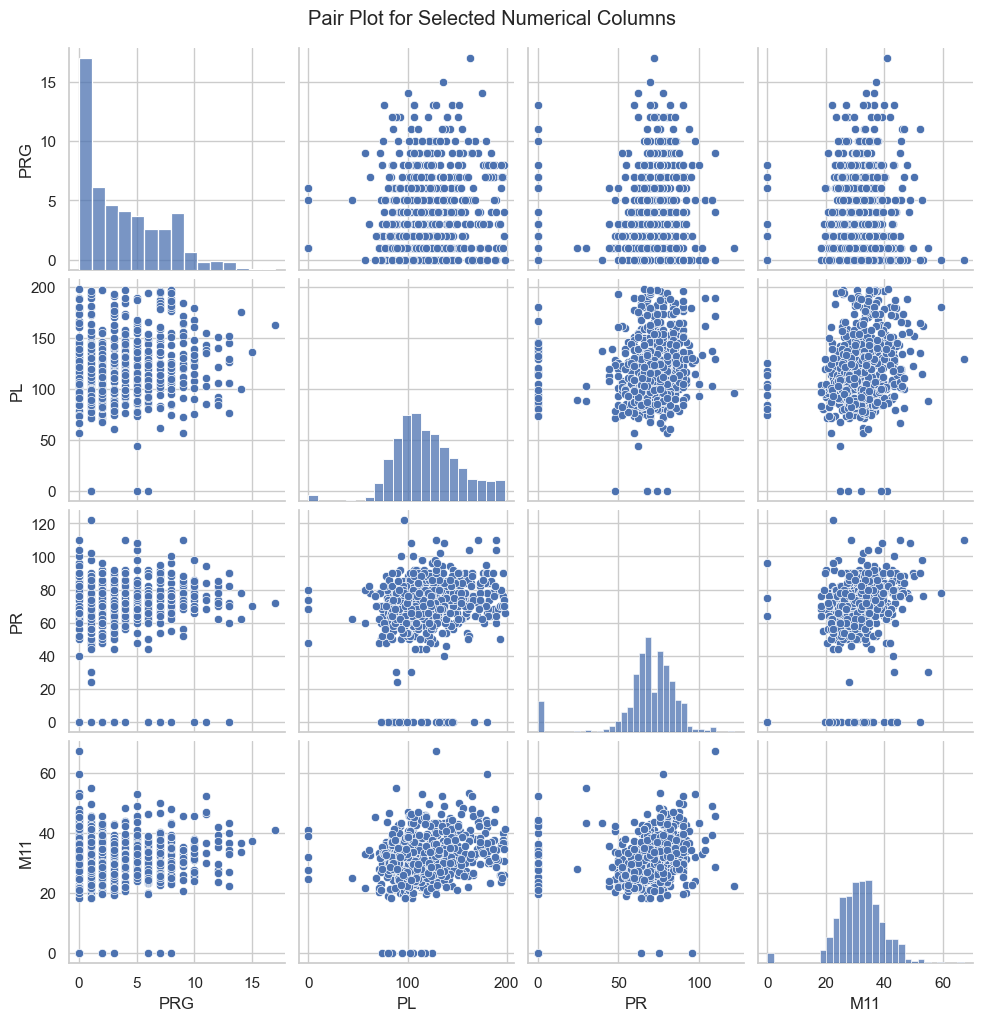

In [21]:
# Selecting four numerical columns for the pair plot
selected_numerical_columns = ['PRG', 'PL', 'PR', 'M11']

# Set the style for seaborn
sns.set(style="whitegrid")

# Multivariate Analysis: Pair Plot for Selected Numerical Columns
sns.pairplot(train_data[selected_numerical_columns])
plt.suptitle('Pair Plot for Selected Numerical Columns', y=1.02)
plt.show()

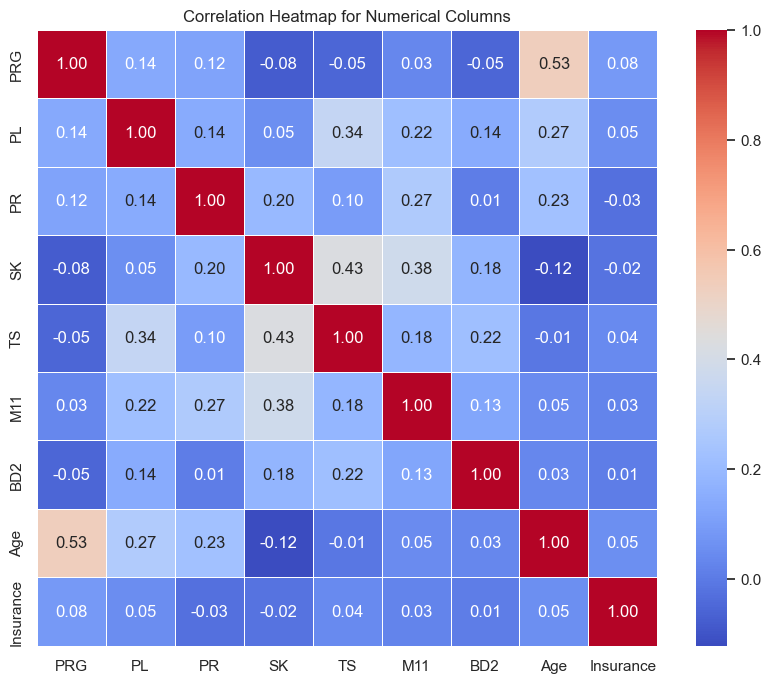

In [22]:
# Selecting all numerical columns for the correlation heatmap
numerical_columns = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set the style for seaborn
sns.set(style="white")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

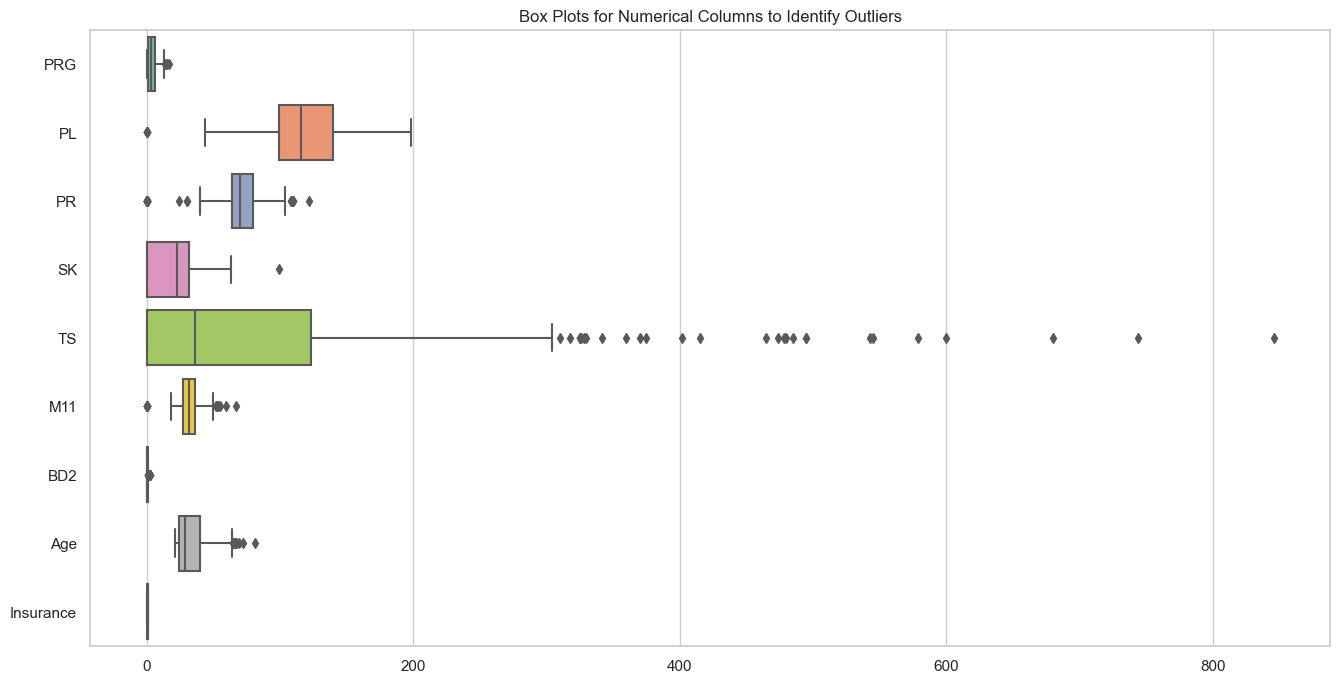

In [23]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot box plots for each numerical column
plt.figure(figsize=(16, 8))
sns.boxplot(data=train_data, orient='h', palette='Set2')
plt.title('Box Plots for Numerical Columns to Identify Outliers')
plt.show()

In [24]:
# Print column names
print(train_data.columns)

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')


In [25]:
# Specify the columns of interest
columns_of_interest =  ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

# Check if outliers still exist in the columns
outliers_exist = False

for column in columns_of_interest:
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Modify the values in the column to be within the range
    train_data[column] = train_data[column].clip(lower_bound, upper_bound)

    # Check if outliers exist in the column
    if (train_data[column] < lower_bound).any() or (train_data[column] > upper_bound).any():
        outliers_exist = True
        print(f"Outliers still exist in '{column}'.")

if not outliers_exist:
    print("No outliers exist in the specified columns.")

No outliers exist in the specified columns.


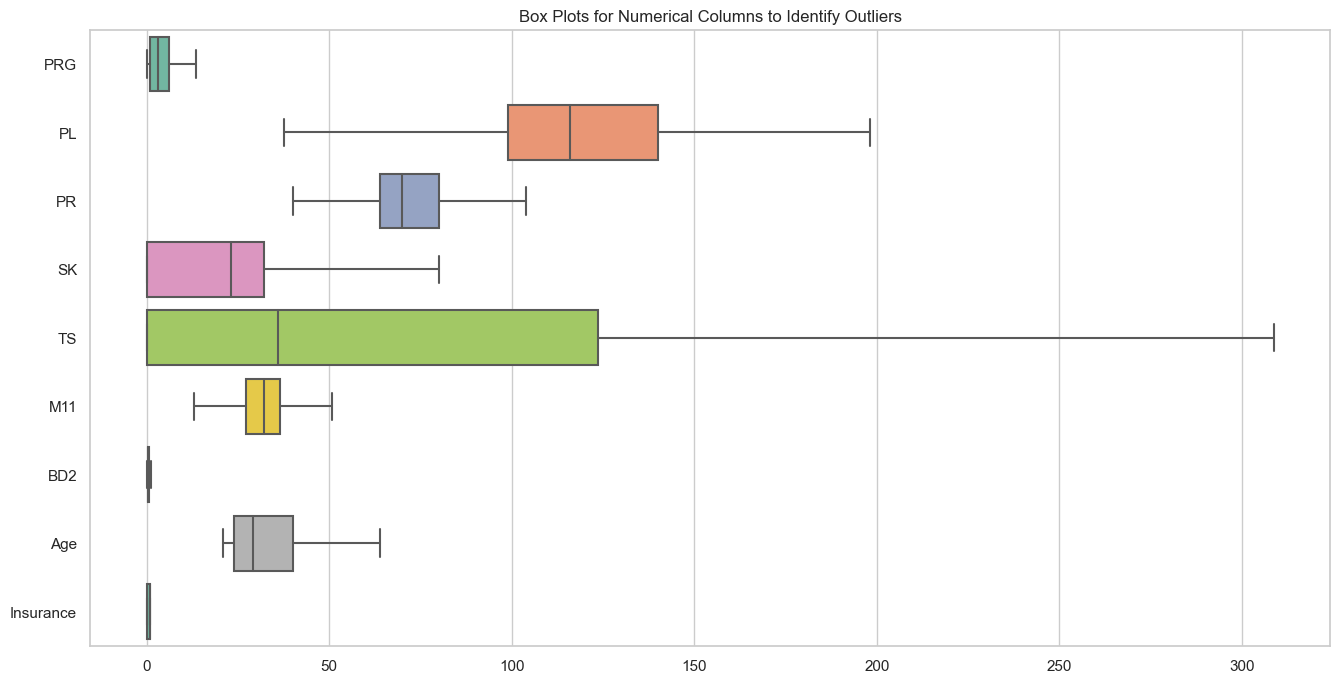

In [26]:
#checking again for outliers after removing them

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot box plots for each numerical column
plt.figure(figsize=(16, 8))
sns.boxplot(data=train_data, orient='h', palette='Set2')
plt.title('Box Plots for Numerical Columns to Identify Outliers')
plt.show()

### Issues With the Data
* The column names are not very descriptive.

* The target variable 'Sepssis' may have imbalanced classes.

* There are many outliers in some of the numerical columns.

In [27]:
from scipy.stats import ttest_ind

# Assuming 'Age' is the column representing patient age
age_sepsis_positive = train_data[train_data['Sepssis'] == 'Positive']['Age']
age_sepsis_negative = train_data[train_data['Sepssis'] == 'Negative']['Age']

# Perform t-test
t_stat, p_value = ttest_ind(age_sepsis_positive, age_sepsis_negative, equal_var=False)

# Print results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average age.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average age.")


T-statistic: 5.570030519972914
P-value: 4.407050360195549e-08
Reject the null hypothesis: There is a significant difference in average age.


## Data Preprocessing

In [28]:
# Rename the columns
train_data = train_data.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Sepsis"
})

In [29]:
train_data.head()

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6.0,148.0,72,35,0.0,33.6,0.6270,50,0,Positive
1,ICU200011,1.0,85.0,66,29,0.0,26.6,0.3510,31,0,Negative
2,ICU200012,8.0,183.0,64,0,0.0,23.3,0.6720,32,1,Positive
3,ICU200013,1.0,89.0,66,23,94.0,28.1,0.1670,21,1,Negative
4,ICU200014,0.0,137.0,40,35,168.0,43.1,1.2455,33,1,Positive


In [30]:
# Check for missing values
print(train_data.isnull().sum())


ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Patient_age       0
Insurance         0
Sepsis            0
dtype: int64


In [31]:
# Replace "Positive" with 1 and "Negative" with 0
train_data['Sepsis'] = train_data['Sepsis'].replace({'Positive': 1, 'Negative': 0})

# Print the updated DataFrame
train_data.head(5)

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6.0,148.0,72,35,0.0,33.6,0.6270,50,0,1
1,ICU200011,1.0,85.0,66,29,0.0,26.6,0.3510,31,0,0
2,ICU200012,8.0,183.0,64,0,0.0,23.3,0.6720,32,1,1
3,ICU200013,1.0,89.0,66,23,94.0,28.1,0.1670,21,1,0
4,ICU200014,0.0,137.0,40,35,168.0,43.1,1.2455,33,1,1


## **Dropping Unnecessary Columns**
* We will remove Blood_work_R2

* We will remove the ID column

* we drop Insurance as well since it isnt a relevant field

In [32]:
#dropping unnecessary columns

train_data = train_data.drop(['Blood_Work_R2', 'ID', 'Insurance'], axis=1)
train_data.head()

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Sepsis
0,6.0,148.0,72,0.0,33.6,0.6270,50,1
1,1.0,85.0,66,0.0,26.6,0.3510,31,0
2,8.0,183.0,64,0.0,23.3,0.6720,32,1
3,1.0,89.0,66,94.0,28.1,0.1670,21,0
4,0.0,137.0,40,168.0,43.1,1.2455,33,1


# **Data Preparation**

## **Data Spliting**


In [33]:
#Splitting data into x_train and x_test

X = train_data.drop('Sepsis', axis=1)
y = train_data['Sepsis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#checking shape after splitting
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((479, 7), (120, 7), (479,), (120,))

In [34]:
X_train

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age
145,0.0,102.0,75,0.00,12.925,0.572,21
9,8.0,125.0,96,0.00,12.925,0.232,54
375,12.0,140.0,82,308.75,39.200,0.528,58
522,6.0,114.0,40,0.00,12.925,0.189,26
188,8.0,109.0,76,114.00,27.900,0.640,31
...,...,...,...,...,...,...,...
71,5.0,139.0,64,140.00,28.600,0.411,26
106,1.0,96.0,104,0.00,22.400,0.207,27
270,10.0,101.0,86,0.00,45.600,1.136,38
435,0.0,141.0,40,0.00,42.400,0.205,29


In [35]:
y_train

145    0
9      1
375    1
522    0
188    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Sepsis, Length: 479, dtype: int64

## **Detecting Data Imbalance**

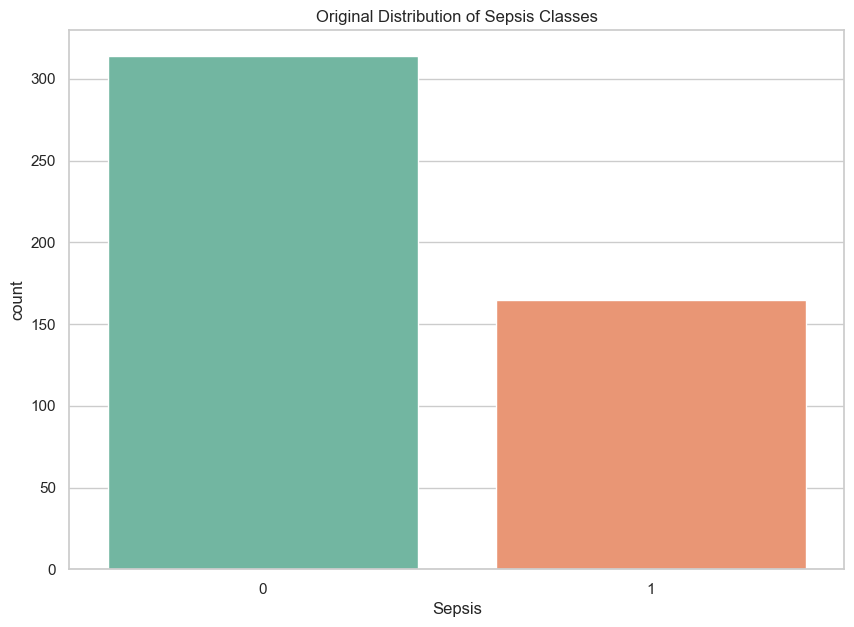

Sepsis
0    314
1    165
Name: count, dtype: int64


In [36]:
# Count and plot the distribution of the original 'Sepsis' classes
sns.countplot(x=y_train, palette='Set2')
plt.title('Original Distribution of Sepsis Classes')
plt.show()

# Check the distribution of values in the 'Sepsis' column
sepsis_distribution = y_train.value_counts()

# Print the distribution
print(sepsis_distribution)

Dataset is imbalanced so we can't use Accuracy Score to choose our model

To solve this issue: we'll Oversample our minority class using RandomOverSampler

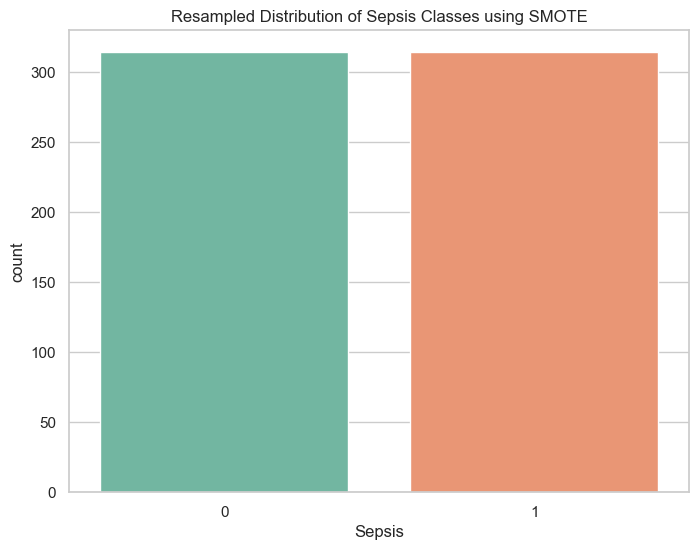

Sepsis
0    314
1    314
Name: count, dtype: int64


In [37]:

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Count and plot the distribution of the resampled 'Sepsis' classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Resampled Distribution of Sepsis Classes using SMOTE')
plt.show()

# Check the distribution of values in the 'Sepsis' column
sepsis_distribution = y_resampled.value_counts()

# Print the distribution
print(sepsis_distribution)

## **Feature Scaling**

In [38]:
# Create an instance of StandardScaler and set output to be a DataFrame
scaler = StandardScaler().fit(X_train).set_output (transform="pandas")

# Scale the training data
X_train_df = scaler.transform(X_train)

# Scale the test data using the same scaler
X_test_df = scaler.transform(X_test)

## **Save Preprocessed Data**

In [39]:
# # Save the preprocessed data to a new CSV file
# X_train_df.to_csv('preprocessed_data.csv', index=False)


# MODELLING

Here is the section to build, train, evaluate and compare the models to each other.
* Logistic Regression
* RandomForest Classifier
* XGBoost Classifier
* K Nearest Neighbors
* Support Vector Machines
* DecisionTreeClassifier
* Gradient Boosting Classifier Model

In [40]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machines': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [41]:
models

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'K Nearest Neighbors': KNeighborsClassifier(),
 'Support Vector Machines': SVC(),
 'Decision Tree': DecisionTreeClassifier(),
 'Gradie

# EVALUATION

In [42]:
# Initialize DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Train and evaluate each model
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Add 'average' parameter
    recall = recall_score(y_test, y_pred, average='binary')  # Add 'average' parameter
    f1 = f1_score(y_test, y_pred, average='binary')  # Add 'average' parameter
    roc_auc = roc_auc_score(y_test, y_pred)

    # Add results to DataFrame
    results_df = results_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}, ignore_index=True)



Evaluating Logistic Regression...


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Display the results DataFrame
print("\nResults Summary:")
results_df

In [ ]:
# Calculate confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Models Comparison

In [ ]:
# Set the style for seaborn
sns.set(style="darkgrid")

# Plot the accuracy of each model using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df, color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Model')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the plot
plt.show()

## **k-Fold Cross Validation**

In [ ]:

def kfold_cross_validation_for_models(models, X, y, num_folds=5):
    """
    Perform k-fold cross-validation for each model.

    Parameters:
    - models: Dictionary of models to evaluate.
    - X: Features.
    - y: Target variable.
    - num_folds: Number of folds for cross-validation.

    Returns:
    - results_df: DataFrame containing cross-validation results for each model.
    """
    # Initialize DataFrame to store results
    results_df = pd.DataFrame(columns=['Model', 'Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

    # Iterate over models
    for model_name, model in models.items():
        print(f"\nEvaluating {model_name}...")

        # Perform k-fold cross-validation for the current model
        cv_results = kfold_cross_validation(model, X, y, num_folds=num_folds)

        # Add model name to the results
        cv_results['Model'] = model_name

        # Append results to the main DataFrame
        results_df = results_df.append(cv_results, ignore_index=True)

    return results_df

# Example usage
# Replace RandomForestClassifier() and XGBClassifier() with your desired models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machines': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

cv_results_all_models = kfold_cross_validation_for_models(models, X, y, num_folds=5)

# Display the cross-validation results DataFrame for all models
print("\nCross-Validation Results for All Models:")
cv_results_all_models


In [ ]:
# Filter the DataFrame to include only the accuracy results
accuracy_results_all_models = cv_results_all_models[['Model', 'Accuracy']]

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=accuracy_results_all_models, palette='viridis')
plt.title('Model Comparison - 5-Fold Cross-Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to the range of accuracy (0 to 1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Filter the DataFrame to include only the accuracy results for the 5th fold
accuracy_results_5th_fold = cv_results_all_models[cv_results_all_models['Fold'] == 5][['Model', 'Accuracy']]

# Print the accuracy for the 5th fold for each model
print("\nAccuracy for the 5th Fold:")
accuracy_results_5th_fold

In [ ]:
# Calculate the mean accuracy for each model
mean_accuracy_by_model = cv_results_all_models.groupby('Model')['Accuracy'].mean()

# Select the top two models with the highest mean accuracy
top_two_models = mean_accuracy_by_model.nlargest(2)

# Print the two best models and their mean accuracies
print("\nTwo Best Models based on k-fold Cross-Validation:\n")
for model, mean_accuracy in top_two_models.items():
    print(f"Model: {model}, Mean Accuracy: {mean_accuracy}")

# **Hyperparameters Tuning**